In [20]:
buffer = bytearray("XYZ", "utf-8")
print(memoryview(buffer))

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/minwage.csv")

actual_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if actual_min_wage.empty:
        actual_min_wage = group.set_index("Year")[ ["State.Minimum.Wage.2020.Dollars"] ].rename(
            columns={"State.Minimum.Wage.2020.Dollars" : str(name) + " Min Wage"})
    else:
        actual_min_wage = actual_min_wage.join(
            group.set_index("Year")[ ["State.Minimum.Wage.2020.Dollars"]].rename(
                columns={"State.Minimum.Wage.2020.Dollars" : str(name) + " Min Wage"}))

actual_min_wage.head()

# create a correlation df
min_wage_corr = actual_min_wage.replace(0, np.NaN)
min_wage_corr = min_wage_corr.dropna(axis=1).corr() # axis = 1 (1 for N/A cols)
min_wage_corr.head()
        

,Alaska Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Guam Min Wage,Hawaii Min Wage,Idaho Min Wage,...,Oregon Min Wage,Pennsylvania Min Wage,Rhode Island Min Wage,South Dakota Min Wage,Utah Min Wage,Vermont Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
Alaska Min Wage,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas Min Wage,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California Min Wage,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado Min Wage,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut Min Wage,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


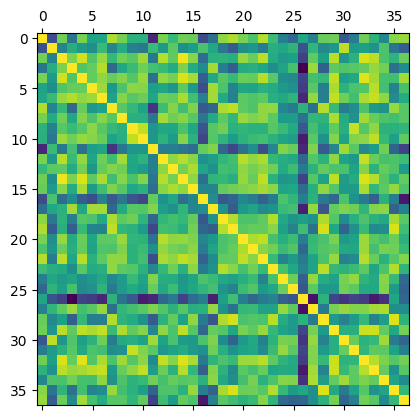

In [22]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

# problem is with the graph below is that it doesnt have labels and instead 
#   uses numbers (for PMCC in %) to show the rate of correlation

C:\Users\zayaa\AppData\Local\Temp\ipykernel_4272\357206400.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
C:\Users\zayaa\AppData\Local\Temp\ipykernel_4272\357206400.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, -5.0, 'Al'),
 Text(0, 0.0, 'Ar'),
 Text(0, 5.0, 'Ca'),
 Text(0, 10.0, 'Co'),
 Text(0, 15.0, 'Co'),
 Text(0, 20.0, 'De'),
 Text(0, 25.0, 'Di'),
 Text(0, 30.0, 'Gu'),
 Text(0, 35.0, 'Ha'),
 Text(0, 40.0, 'Id')]

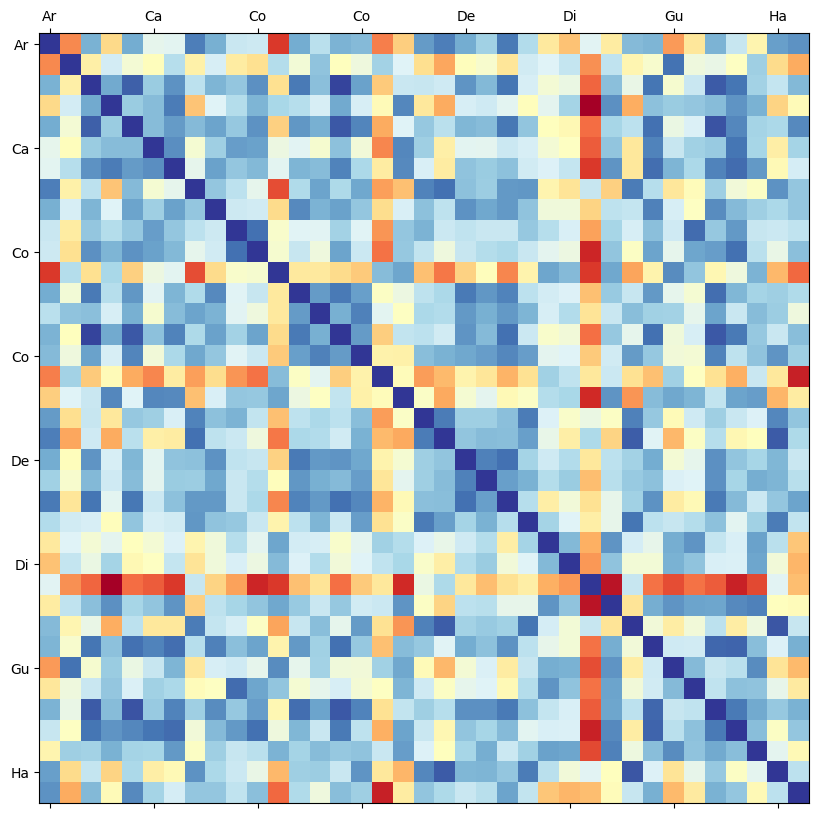

In [23]:
# setting the first 2 letters as the ACRONYM for each state 
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(10, 10))
# to have ax -> subplot -> figure
ax = fig.add_subplot(111) # 1x1 grid and graph

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlBu)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)


# if we set tick labels before showing the plot, we get objects returned as well
    # LETS FIX THIS!


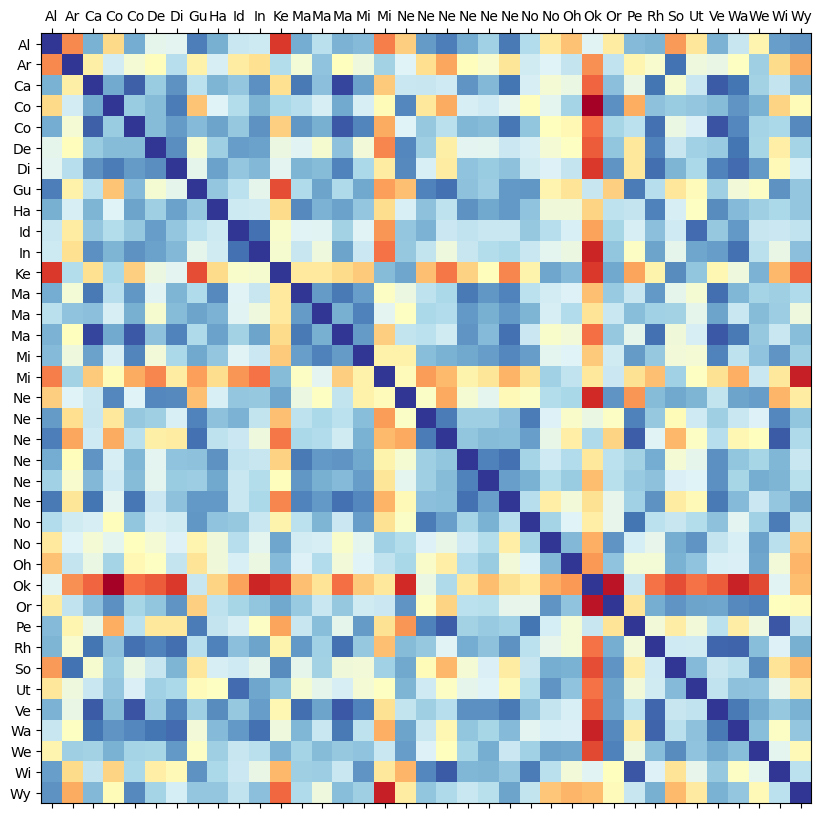

In [24]:
labels = [c[:2] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# reset the plot
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlBu)

# setting the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()


In [25]:
labels

# we can see we have duplicate labels
# so we can either manually fix them or bring them from the internet through *WEBSCRAPING*

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [26]:
# in this case we can use the website: "https://www.infoplease.com/state-abbreviations-and-state-postal-codes"
# as it does not block robots (webscrape bots)

import pandas as pd
import requests

web_request = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

scraped_dfs = pd.read_html(web_request.text)


In [27]:
for df in scraped_dfs:
    print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [28]:
state_abbreviations = scraped_dfs[0]
state_abbreviations.head()

#as shown below for the abbreviations we can use the Postal Code column

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [29]:
# lets save the data above as a CSV file so we avoid having to constantly make HTML requests
state_abbreviations.to_csv("../datasets/state_abbreviations.csv")

In [30]:
state_abbreviations = pd.read_csv("../datasets/state_abbreviations.csv")
state_abbreviations.head()
# now for some reason we have a new column called "Unnamed" because we dont have a good index
# WHICH IS A PROBLEM

,Unnamed: 0,State Name/District,Postal Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


In [31]:
# To fix this we can fix this 3 WAYS

# FIX 1: using the index = False parameter in the to_csv() method
fixed_state_abbrev = scraped_dfs[0]
fixed_state_abbrev[["State Name/District", "Postal Code"]].to_csv("../datasets/fixed_state_abbreviations.csv", index = False)
fixed_state_abbrev = pd.read_csv("../datasets/fixed_state_abbreviations.csv", index_col=0)
# print(fixed_state_abbrev[["Postal Code"]].to_string(index=False))
print(fixed_state_abbrev)

                     Postal Code
State Name/District             
Alabama                       AL
Alaska                        AK
Arizona                       AZ
Arkansas                      AR
California                    CA
Colorado                      CO
Connecticut                   CT
Delaware                      DE
District of Columbia          DC
Florida                       FL
Georgia                       GA
Hawaii                        HI
Idaho                         ID
Illinois                      IL
Indiana                       IN
Iowa                          IA
Kansas                        KS
Kentucky                      KY
Louisiana                     LA
Maine                         ME
Maryland                      MD
Massachusetts                 MA
Michigan                      MI
Minnesota                     MN
Mississippi                   MS
Missouri                      MO
Montana                       MT
Nebraska                      NE
Nevada    

In [32]:
# # To fix this we can fix this 3 WAYS

# # FIX 2: using the index_cols = 0 (removing newly added indexed cols) parameter in pd.read_csv()
# fixed_state_abbrev = scraped_dfs[0]
# fixed_state_abbrev.to_csv("../datasets/fixed_state_abbreviations.csv")
# fixed_state_abbrev = pd.read_csv("../datasets/fixed_state_abbreviations.csv", index_cols = 0)
# fixed_state_abbrev.head()

In [33]:
# # To fix this we can fix this 3 WAYS

# # FIX 3: using both parameter in to_csv(filepath, index = T/F) and 
    # pd.read_csv(filepath, index_cols = 0)
# fixed_state_abbrev = scraped_dfs[0]
# fixed_state_abbrev.to_csv("../datasets/fixed_state_abbreviations.csv", index = False)
# fixed_state_abbrev = pd.read_csv("../datasets/fixed_state_abbreviations.csv", index_cols = 0)
# fixed_state_abbrev.head()

# NOTE: this fix will not print out any index at atll

In [34]:
abbreviations_dict = fixed_state_abbrev.to_dict()
abbreviations_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

In [35]:
# labels =  [abbreviations_dict[pc] for pc in min_wage_corr.columns]
# labels2 = fixed_state_abbrev[["Postal Code"]].values
# print(str(len(labels)) + " " + str(len(labels2)))

# print(labels2)
          
 
# # gives error as we dont have some abbreviations for some states, so we can do those manually
#   # (just a few anyways)

In [44]:
# make a function to access a nested dictionary (meant for fixed_state_abbrev) and assign each state and post code acronym to a new map
def mapStateToCode(d, map):
    for k, v in d.items():
        if isinstance(v, dict):
            mapStateToCode(v, map)
        else:
            state = str(k) + " Min Wage"
            map[state] = v # ("{0} : {1}".format(k, v))
    return map

map = {}
map = mapStateToCode(fixed_state_abbrev.to_dict(), map)
print(map)

# for k, v in map.items():
#     abbreviations_dict[k] = v




{'Alabama Min Wage': 'AL', 'Alaska Min Wage': 'AK', 'Arizona Min Wage': 'AZ', 'Arkansas Min Wage': 'AR', 'California Min Wage': 'CA', 'Colorado Min Wage': 'CO', 'Connecticut Min Wage': 'CT', 'Delaware Min Wage': 'DE', 'District of Columbia Min Wage': 'DC', 'Florida Min Wage': 'FL', 'Georgia Min Wage': 'GA', 'Hawaii Min Wage': 'HI', 'Idaho Min Wage': 'ID', 'Illinois Min Wage': 'IL', 'Indiana Min Wage': 'IN', 'Iowa Min Wage': 'IA', 'Kansas Min Wage': 'KS', 'Kentucky Min Wage': 'KY', 'Louisiana Min Wage': 'LA', 'Maine Min Wage': 'ME', 'Maryland Min Wage': 'MD', 'Massachusetts Min Wage': 'MA', 'Michigan Min Wage': 'MI', 'Minnesota Min Wage': 'MN', 'Mississippi Min Wage': 'MS', 'Missouri Min Wage': 'MO', 'Montana Min Wage': 'MT', 'Nebraska Min Wage': 'NE', 'Nevada Min Wage': 'NV', 'New Hampshire Min Wage': 'NH', 'New Jersey Min Wage': 'NJ', 'New Mexico Min Wage': 'NM', 'New York Min Wage': 'NY', 'North Carolina Min Wage': 'NC', 'North Dakota Min Wage': 'ND', 'Ohio Min Wage': 'OH', 'Oklahoma

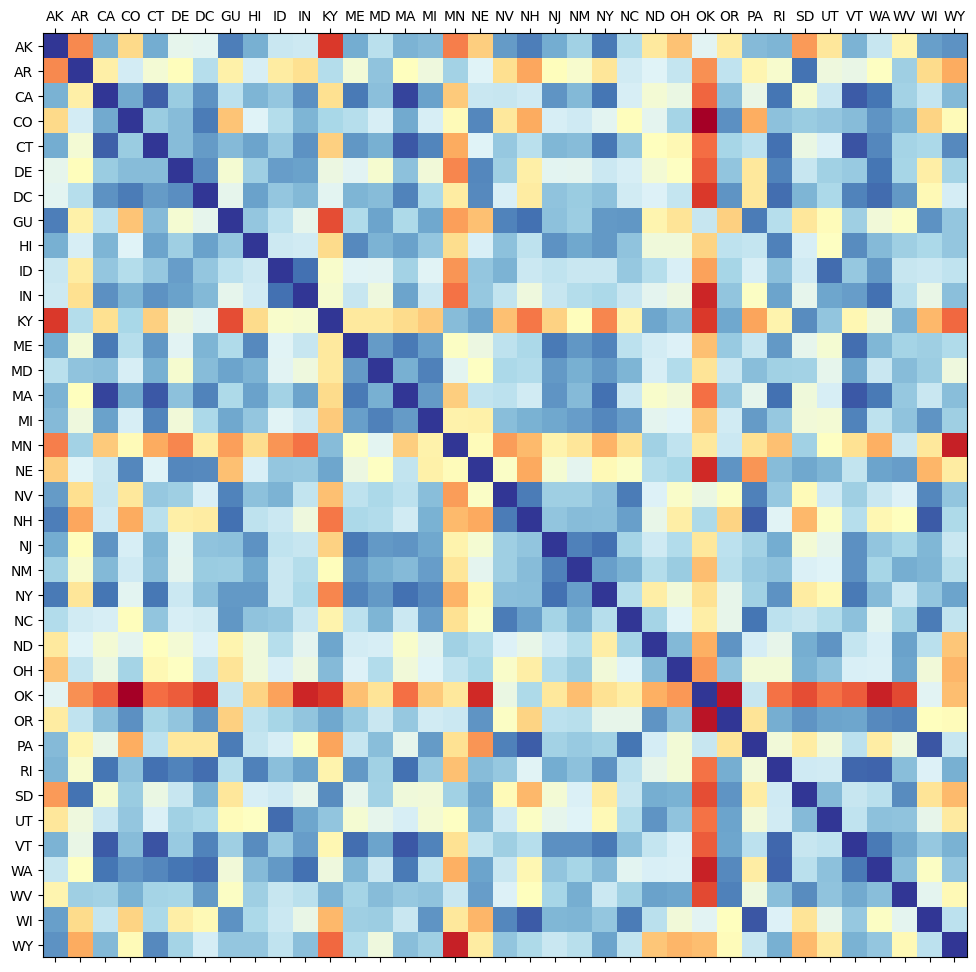

In [51]:
# guam is missing so we reassigning manually
map["Guam Min Wage"] = "GU"

# now we reassing labels to be every value (POST CODE ACRONYM) in map
labels = [map[pc] for pc in min_wage_corr.columns]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# reset the plot
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlBu)

# setting the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.savefig("state_min_wage_correlation.png")

plt.show()
